In [77]:
#Pre-Processing packages:
import numpy as np 
import pandas as pd 
from datetime import datetime


#Data Visualization Packages:
#Seaborn
import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]

#Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

#Colorama
from colorama import Fore, Back, Style # For text colors
y_= Fore.CYAN
m_= Fore.WHITE

#NetworkX
import networkx as nx

#To avoid printing of Deprecation warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

#Time series Analysis:

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [24]:
# Coverting the date column to datetime and sorting
#data['Date'] =  pd.to_datetime(data['Date'],infer_datetime_format=True,format='%y-%m-%d')
#data.sort_values(by='Date',inplace=True)

#Reading data
#Hourly data
bt_data=pd.read_csv('11_01_20_bit_hist_hr.csv')
eth_data=pd.read_csv('11_01_20_eth_hist_hr.csv')
shib_data=pd.read_csv('11_01_20_doge_hist_hr.csv')
dg_data=pd.read_csv('11_01_20_shib_hist_hr.csv')

#Daily data
bt_dt_data=pd.read_csv('bit_hist_dates.csv')
eth_dt_data=pd.read_csv('eth_hist_dates.csv')
shib_dt_data=pd.read_csv('shib_hist_updt_pr.csv')
dg_dt_data=pd.read_csv('doge_hist_dates.csv')

#print(f"{m_}Records:{y_}{bt_data.shape}\n")
#print(f"{m_}Data types: \n{y_}{bt_data.dtypes}")

In [7]:
#Data visualization
def triplot(x, title,c):
    fig, ax = plt.subplots(3,1,figsize=(20,10),sharex=True)
    sns.distplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2],color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=30)
    plt.tight_layout(pad=3.0)
    plt.show()

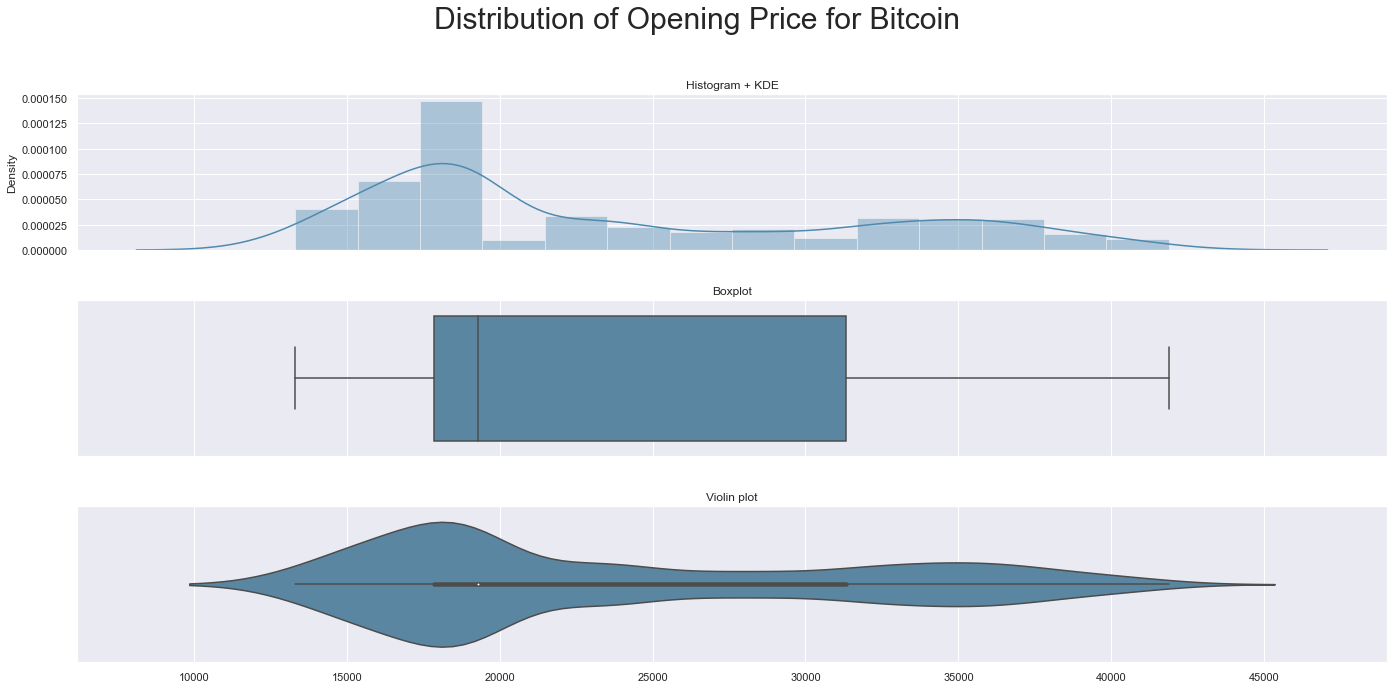

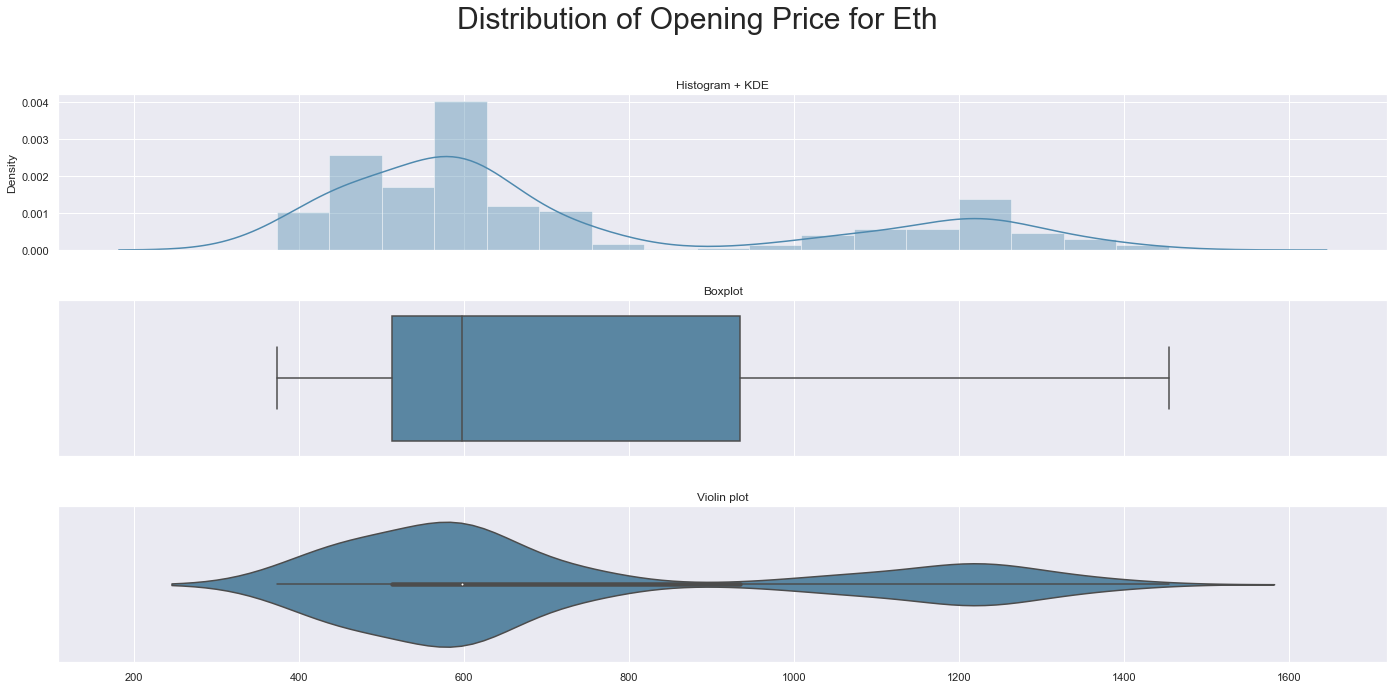

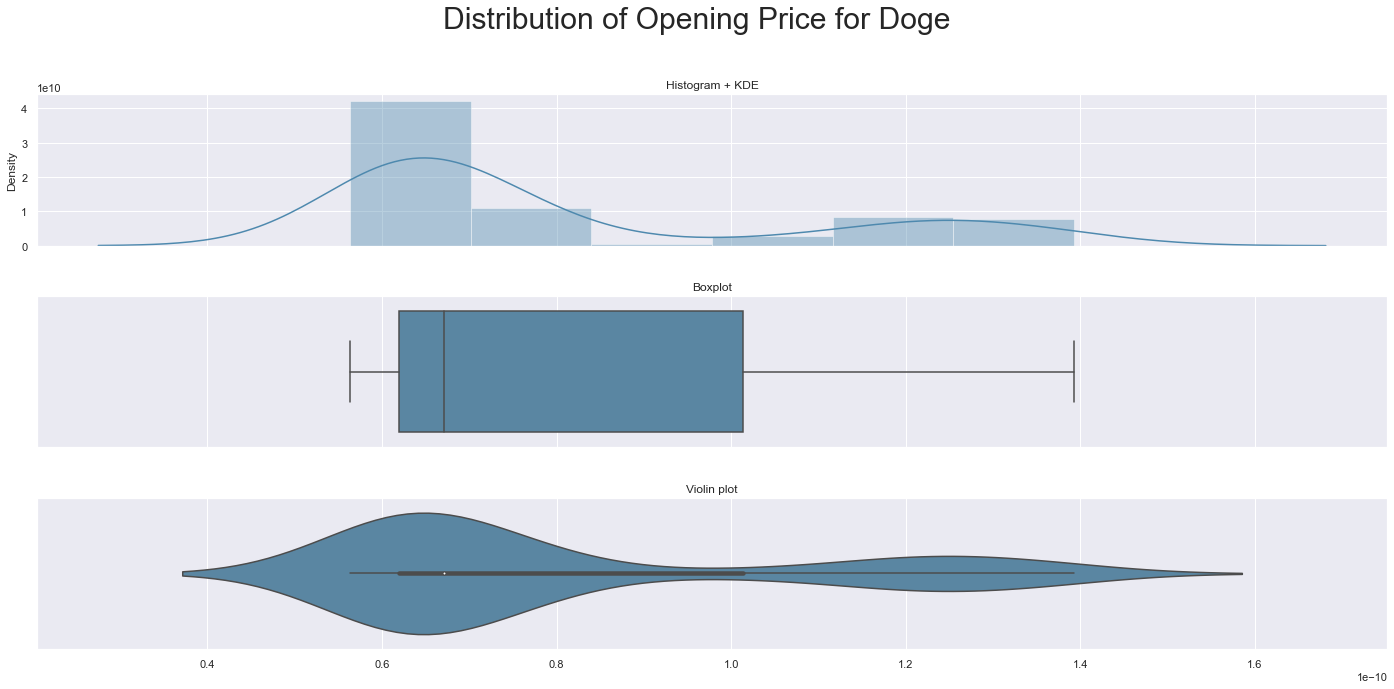

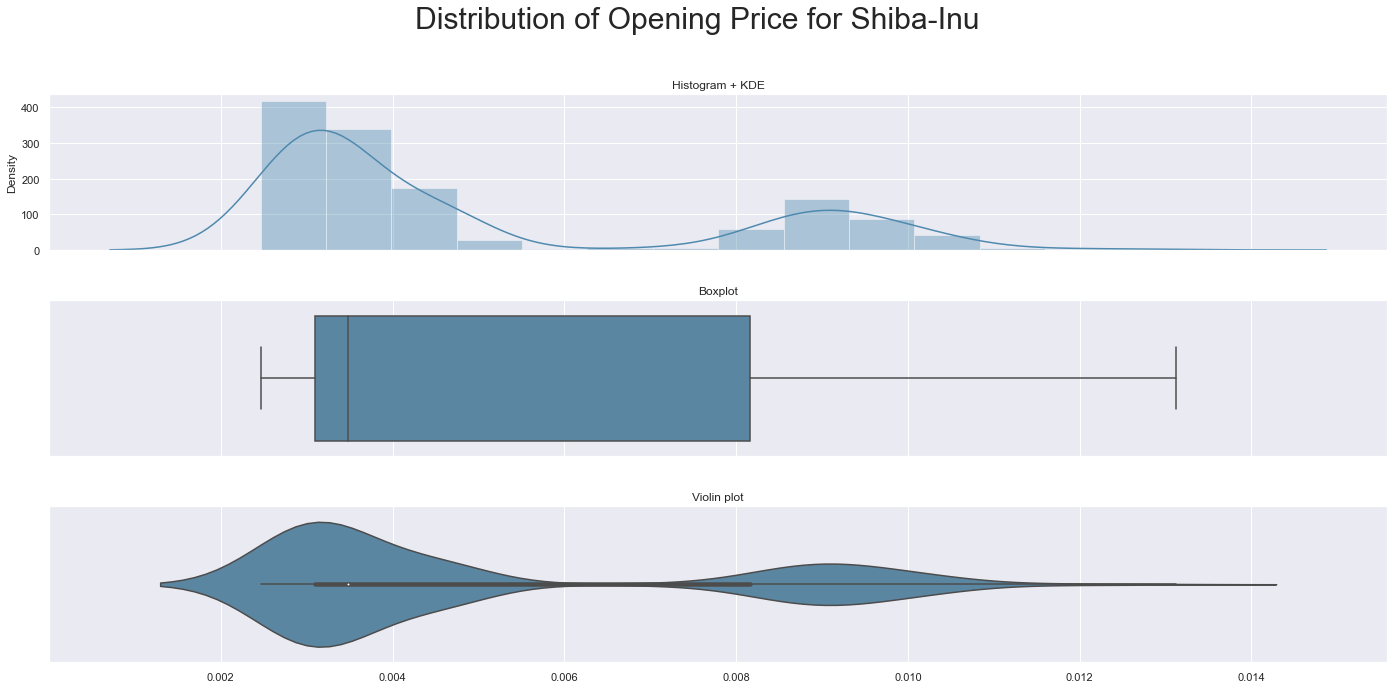

In [13]:
#Visualizing price movement value for the selected crypto currencies
#to understand price movement and possible trend
#the covered time frame is from 11-01-20 to 01-30-21 
#at an hourly rate

#Bitcoin
triplot(bt_data['prices'],'Distribution of Opening Price for Bitcoin',custom_colors[0])
#Etherum
triplot(eth_data['prices'],'Distribution of Opening Price for Eth',custom_colors[0])
#doge
triplot(dg_data['prices'],'Distribution of Opening Price for Doge',custom_colors[0])
#shiba-inu
triplot(shib_data['prices'],'Distribution of Opening Price for Shiba-Inu',custom_colors[0])


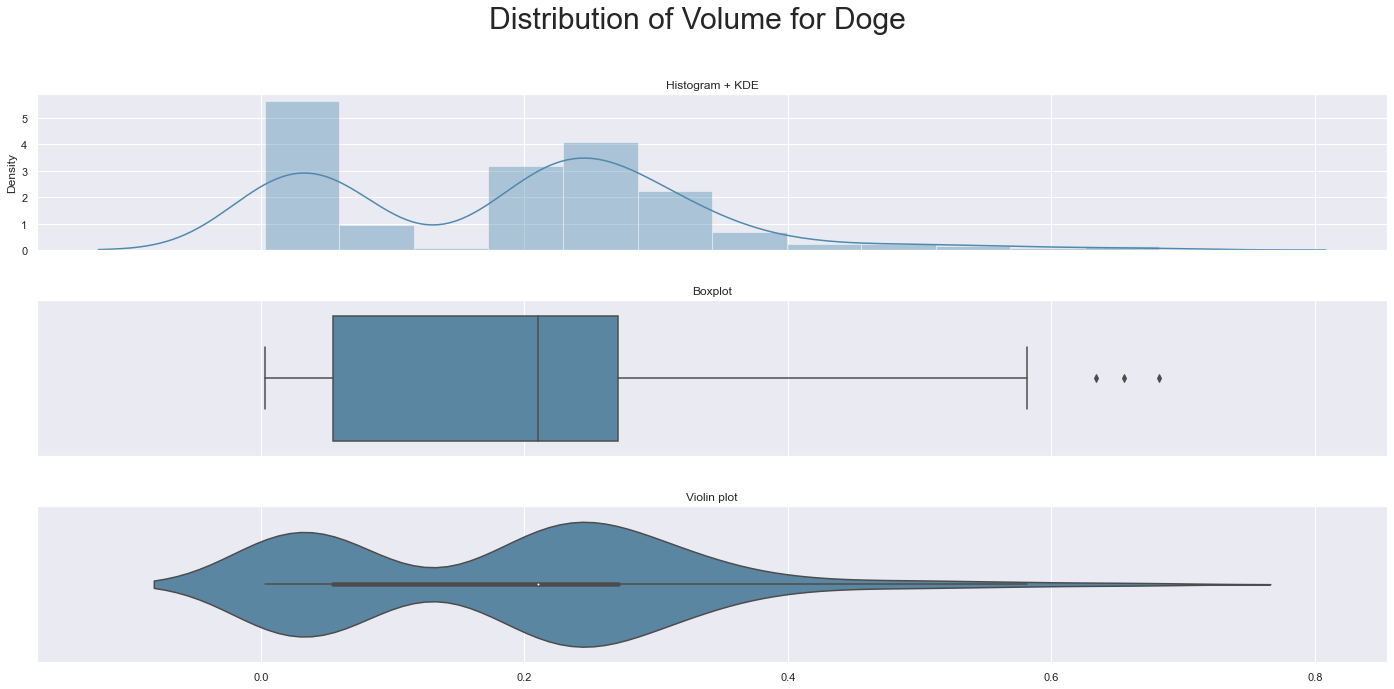

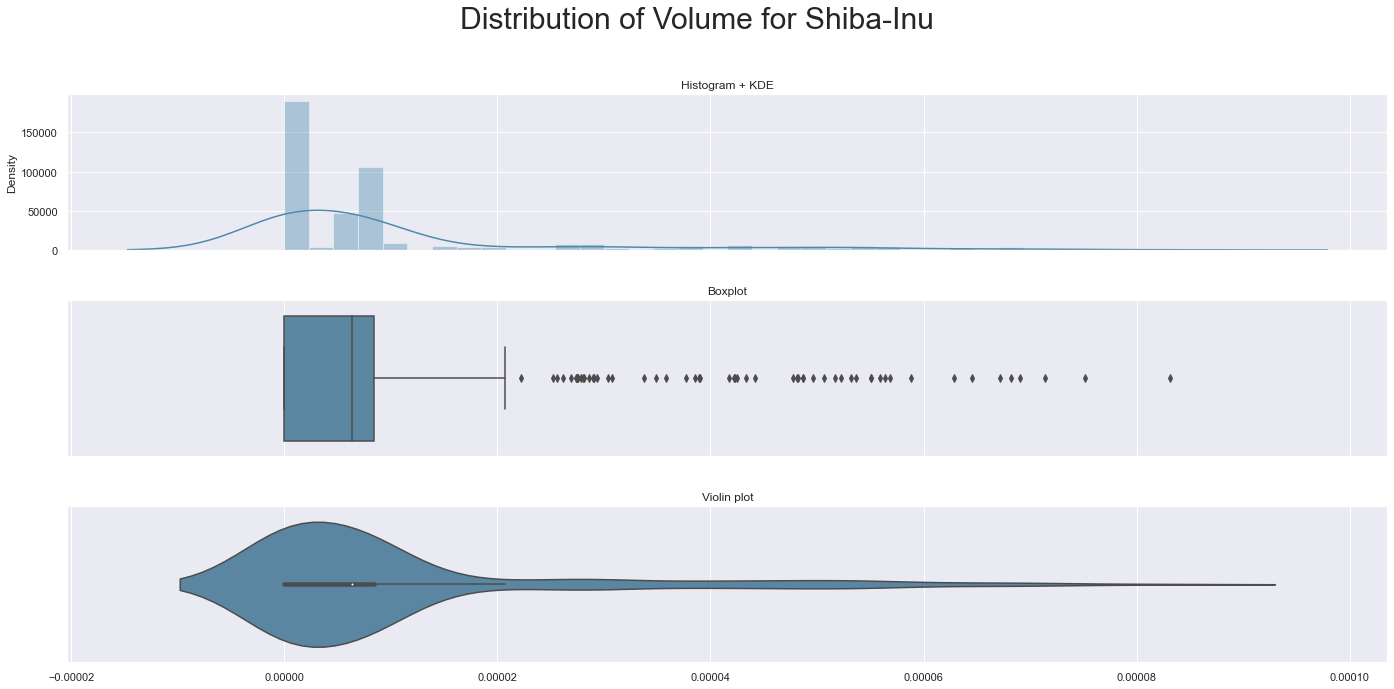

In [25]:
#Visualizing selected cryptocurrencies
#at a larger time span starting at 11-20-2020 until 12-08-21

#Bitcoin
triplot(bt_dt_data['prices'],'Distribution of Volume for Bitcoin',custom_colors[0])
#Etherum
triplot(eth_dt_data['prices'],'Distribution of Volume for Eth',custom_colors[0])
#doge
triplot(dg_dt_data['prices'],'Distribution of Volume for Doge',custom_colors[0])
#shiba-inu
triplot(shib_dt_data['prices'],'Distribution of Volume for Shiba-Inu',custom_colors[0])


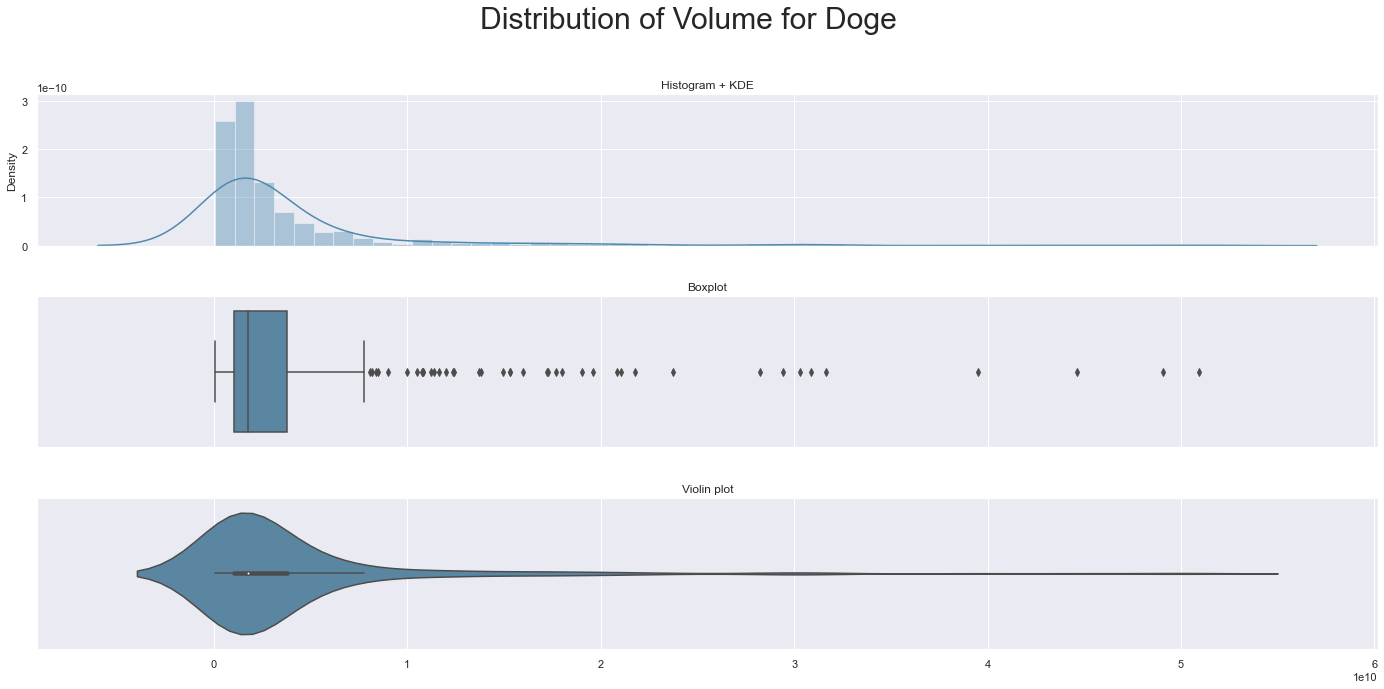

In [26]:
#Visualizing coin volumes

#Bitcoin
triplot(bt_dt_data['total_volumes'],'Distribution of Volume for Bitcoin',custom_colors[0])
#Etherum
triplot(eth_dt_data['total_volumes'],'Distribution of Volume for Eth',custom_colors[0])
#doge
triplot(dg_dt_data['total_volumes'],'Distribution of Volume for Doge',custom_colors[0])
#shiba-inu
triplot(shib_dt_data['total_volumes'],'Distribution of Volume for Shiba-Inu',custom_colors[0])


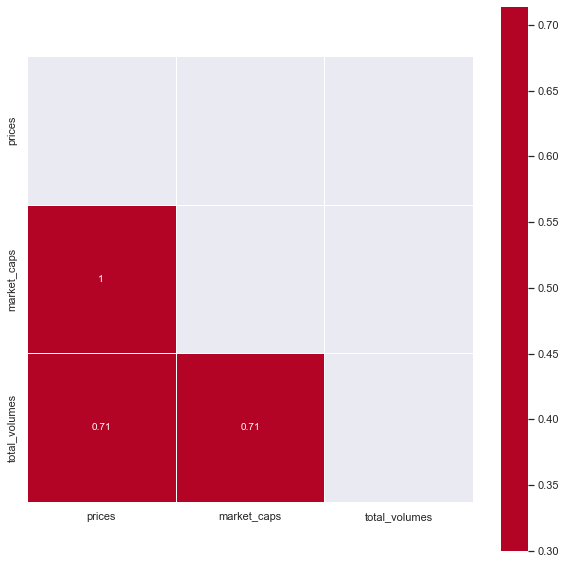

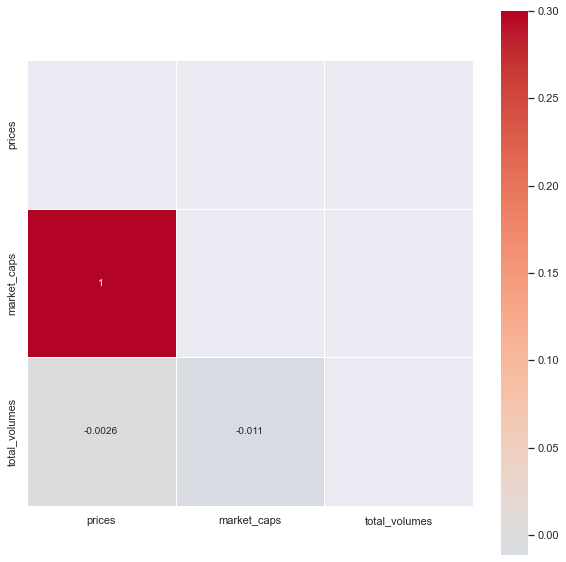

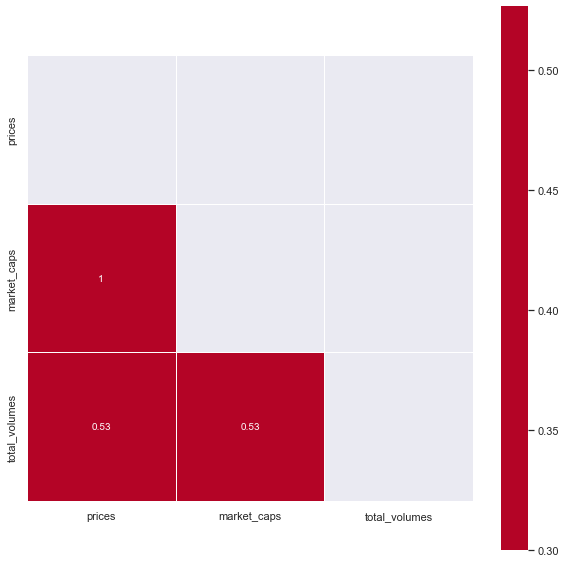

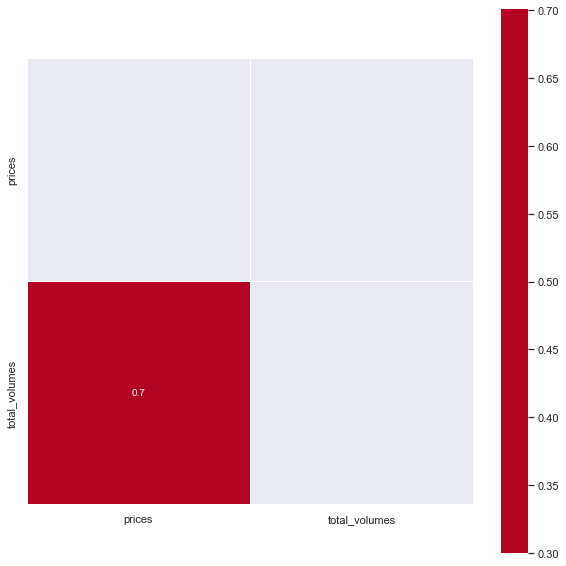

In [29]:
#Correlation analysis
#Bitcoin
plt.figure(figsize=(10,10))
corr=bt_data[bt_data.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(bt_data[bt_data.columns[1:]].corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()
#ETH
plt.figure(figsize=(10,10))
corr=eth_dt_data[eth_dt_data.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(eth_dt_data[eth_dt_data.columns[1:]].corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()
#doge
plt.figure(figsize=(10,10))
corr=dg_dt_data[dg_dt_data.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(dg_dt_data[dg_dt_data.columns[1:]].corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()
#Shib
plt.figure(figsize=(10,10))
corr=shib_dt_data[shib_dt_data.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(shib_dt_data[shib_dt_data.columns[1:]].corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

In [32]:
#Time series analysis for Bitcoin
#Chekcing for trends and seasonanlity
plt.figure(figsize=(15,12))
series = bt_data.prices
result = seasonal_decompose(series, model='additive',period=1)
result.plot()

<Figure size 1080x864 with 0 Axes>

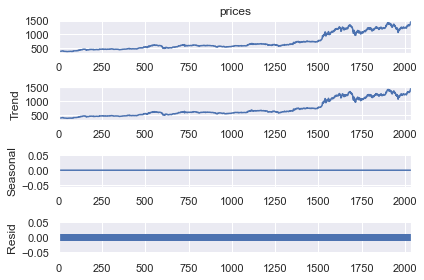

<Figure size 1080x864 with 0 Axes>

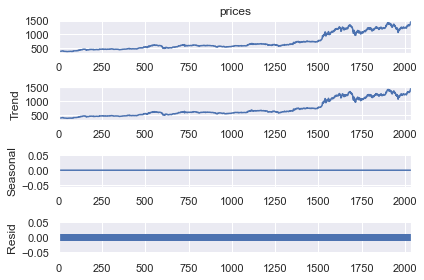

In [33]:
#Time series analysis for Eth
#Chekcing for trends and seasonanlity
plt.figure(figsize=(15,12))
series = eth_data.prices
result = seasonal_decompose(series, model='additive',period=1)
result.plot()

<Figure size 1080x864 with 0 Axes>

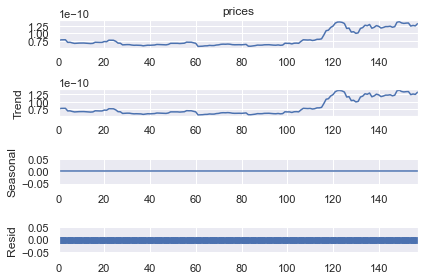

In [34]:
#Time series analysis for Doge
#Chekcing for trends and seasonanlity
plt.figure(figsize=(15,12))
series = dg_data.prices
result = seasonal_decompose(series, model='additive',period=1)
result.plot()

In [35]:
#Time series analysis for Shiba-Inu
#Chekcing for trends and seasonanlity
plt.figure(figsize=(15,12))
series = shib_data.prices
result = seasonal_decompose(series, model='additive',period=1)
result.plot()

<Figure size 1080x864 with 0 Axes>

In [46]:
#Using the augmented dicky fuller test to determine 
#how strongly the time series is defined by a trend
def test_trend(x, log="non stationary"):
   #Dickey Fuller test    
    result = adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-val: %f'%result[1])
    pvalue=result[1]
    
    for key,value in result[4].items():
        if result[0]>value:
            print("The graph has a trend")
            break
        else:
            print("The graph doesn't have a trend")
            break;
    
    print('Important values:')
    for key,value in result[4].items():
        print('\t%s: %.2f ' % (key, value))
    
    #Rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()
    rolstd = x.rolling(window=12,center=False).std()
    
    #Plotting statistics:
    plt.figure(figsize=(25, 11))
    orig = plt.plot(x, color='black', lw=8, label='Original')
    mean = plt.plot(rolmean, color='green', lw=2.5, ls="--",  label='Rolling Mean')
    std = plt.plot(rolstd, color='red', lw=3, label = 'Rolling Std')
    plt.legend(loc='best', fontsize=24)
    plt.title('Rolling Mean and Standard Dev', size=25)
    plt.show(block=False)

ADF Stastistic: -0.852087
p-val: 0.803341
The graph has a trend
Important values:
	1%: -3.43 
	5%: -2.86 
	10%: -2.57 


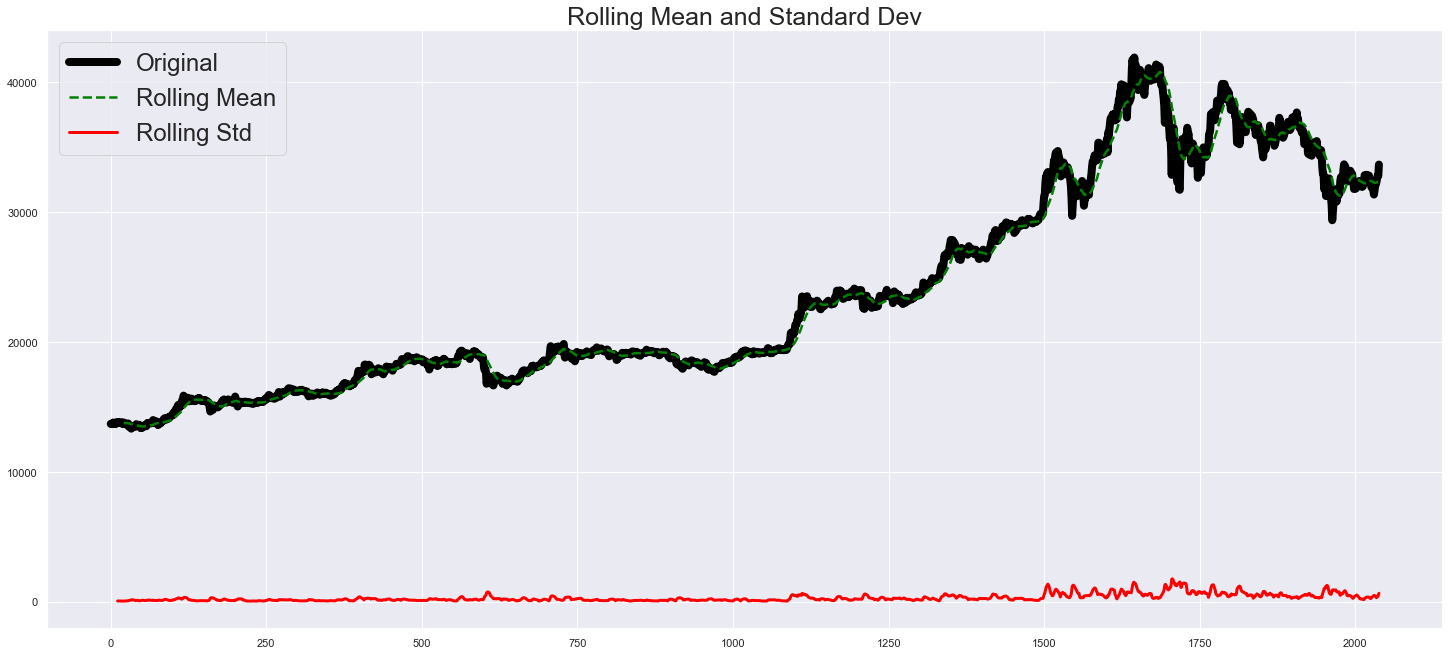

In [47]:
#Using function to test for trend in bitcoin price
test_trend(bt_data.prices, log="non stationary")

ADF Stastistic: 0.532933
p-val: 0.985840
The graph has a trend
Important values:
	1%: -3.43 
	5%: -2.86 
	10%: -2.57 


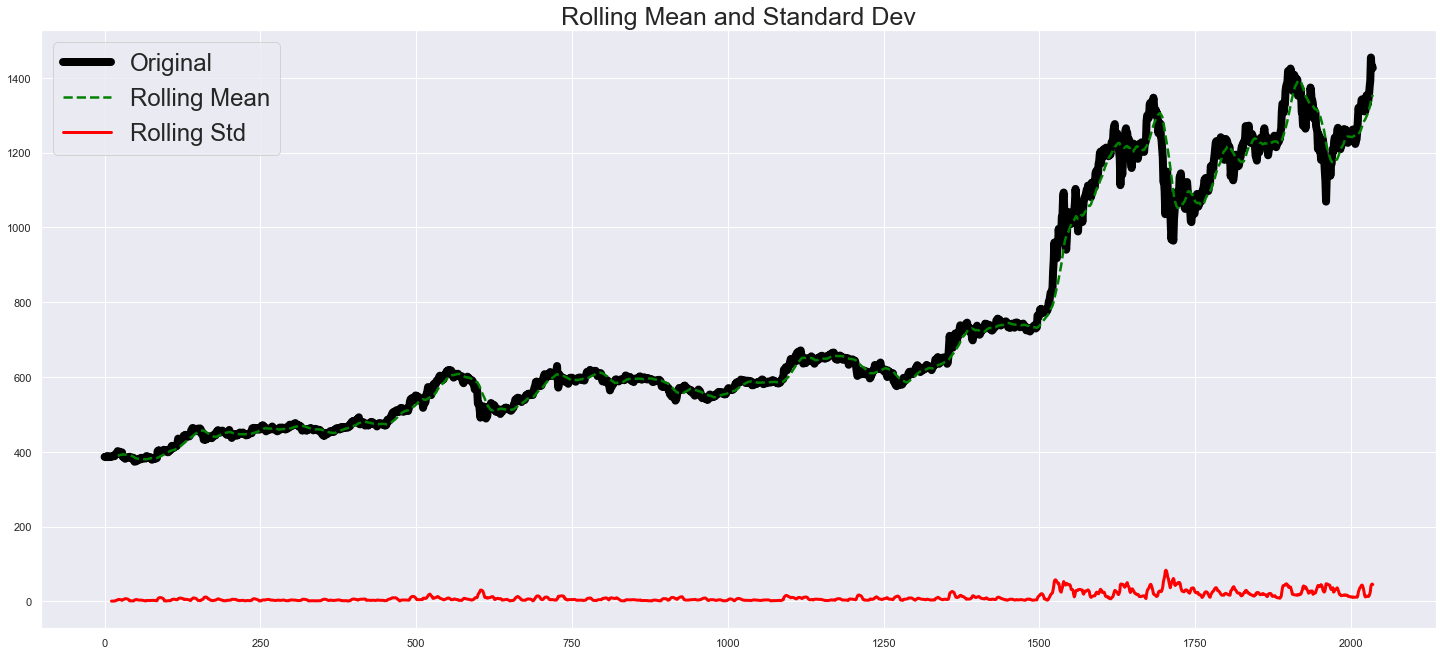

In [48]:
#Using function to test for trend in eth price
test_trend(eth_data.prices, log="non stationary")

In [49]:
#Using function to test for trend in doge price
test_trend(dg_data.prices, log="non stationary")

ADF Stastistic: 0.126502
p-val: 0.967825
The graph has a trend
Important values:
	1%: -3.47 
	5%: -2.88 
	10%: -2.58 


In [50]:
#Using function to test for trend in shiba-inu price
test_trend(shib_data.prices, log="non stationary")

ADF Stastistic: -1.234881
p-val: 0.658414
The graph has a trend
Important values:
	1%: -3.43 
	5%: -2.86 
	10%: -2.57 


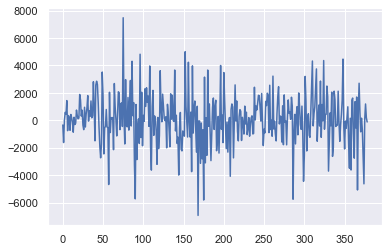

ADF Stastistic: -20.099655
p-val: 0.000000
The graph doesn't have a trend
Important values:
	1%: -3.45 
	5%: -2.87 
	10%: -2.57 


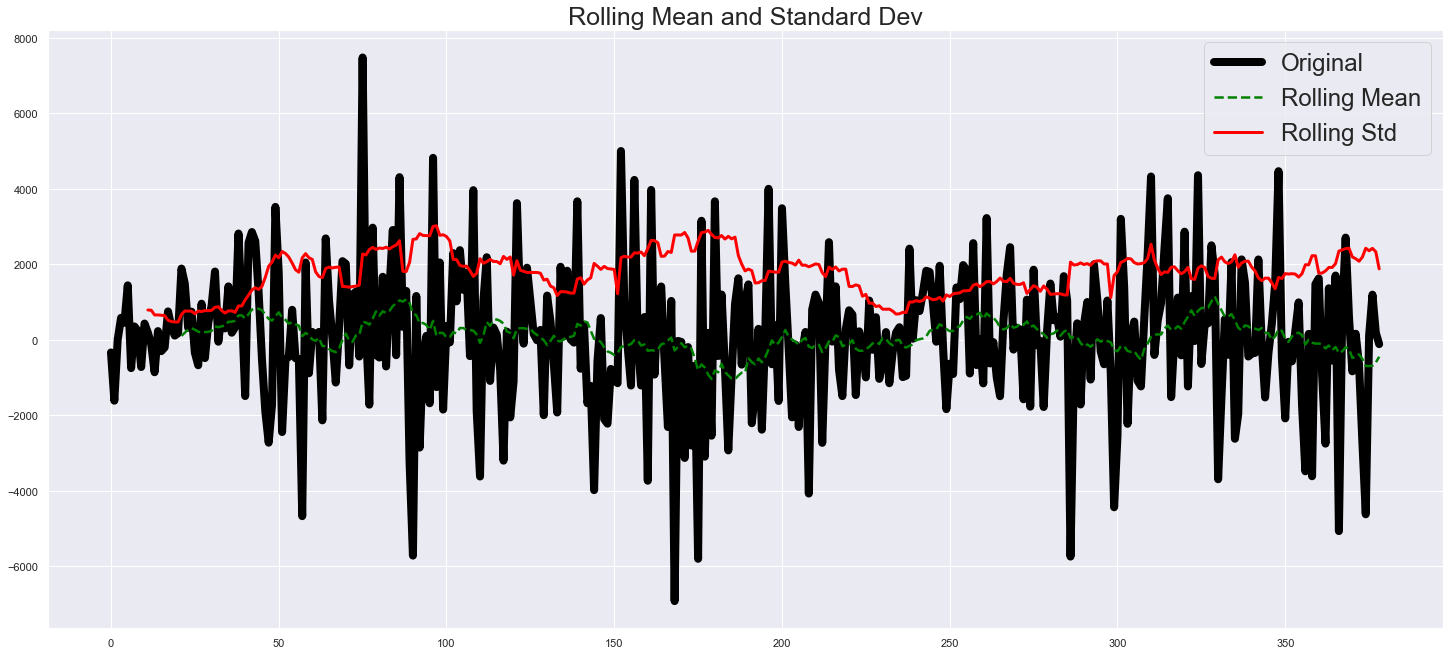

In [71]:
#To be able to use a model for price we will be needing to remove this trend
#by using differencing we will be removing trend
#Reference: https://machinelearningmastery.com/time-series-trends-in-python/
from pandas import datetime
from matplotlib import pyplot

bt_series = pd.read_csv('bit_hist_dates.csv')
X = bt_series.prices
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

bt_adj=pd.DataFrame(diff, columns=['price'])

test_trend(bt_adj, log="stationary")

ADF Stastistic: -21.832042
p-val: 0.000000
The graph doesn't have a trend
Important values:
	1%: -3.45 
	5%: -2.87 
	10%: -2.57 


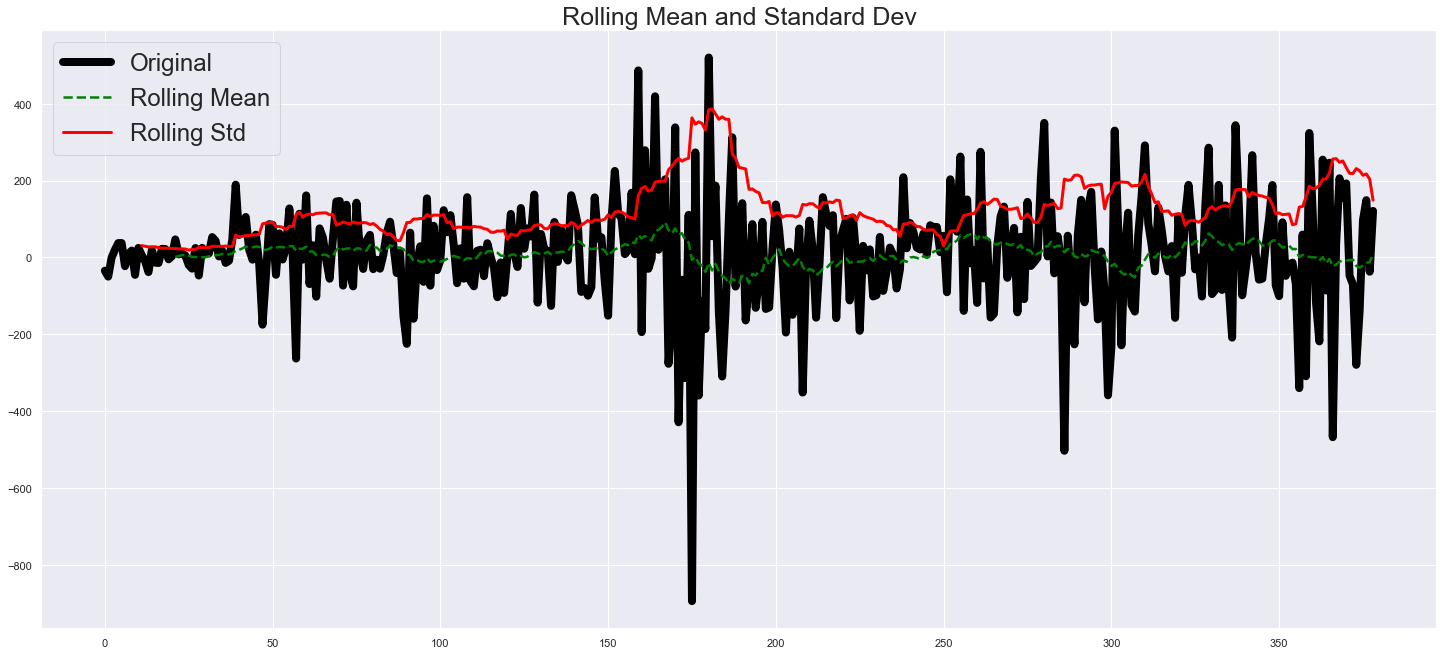

In [72]:
#Removing trend from Eth
eth_series = pd.read_csv('eth_hist_dates.csv')
X = eth_series.prices
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

eth_adj=pd.DataFrame(diff, columns=['price'])

test_trend(eth_adj, log="stationary")

In [73]:
#removing trend from doge
doge_series = pd.read_csv('doge_hist_dates.csv')
X = doge_series.prices
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

doge_adj=pd.DataFrame(diff, columns=['price'])

test_trend(doge_adj, log="stationary")

ADF Stastistic: -6.147918
p-val: 0.000000
The graph doesn't have a trend
Important values:
	1%: -3.45 
	5%: -2.87 
	10%: -2.57 


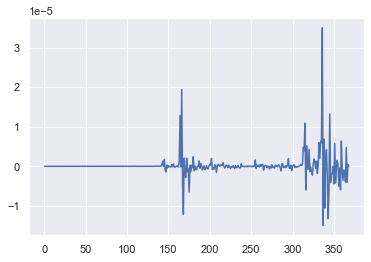

ADF Stastistic: -6.744724
p-val: 0.000000
The graph doesn't have a trend
Important values:
	1%: -3.45 
	5%: -2.87 
	10%: -2.57 


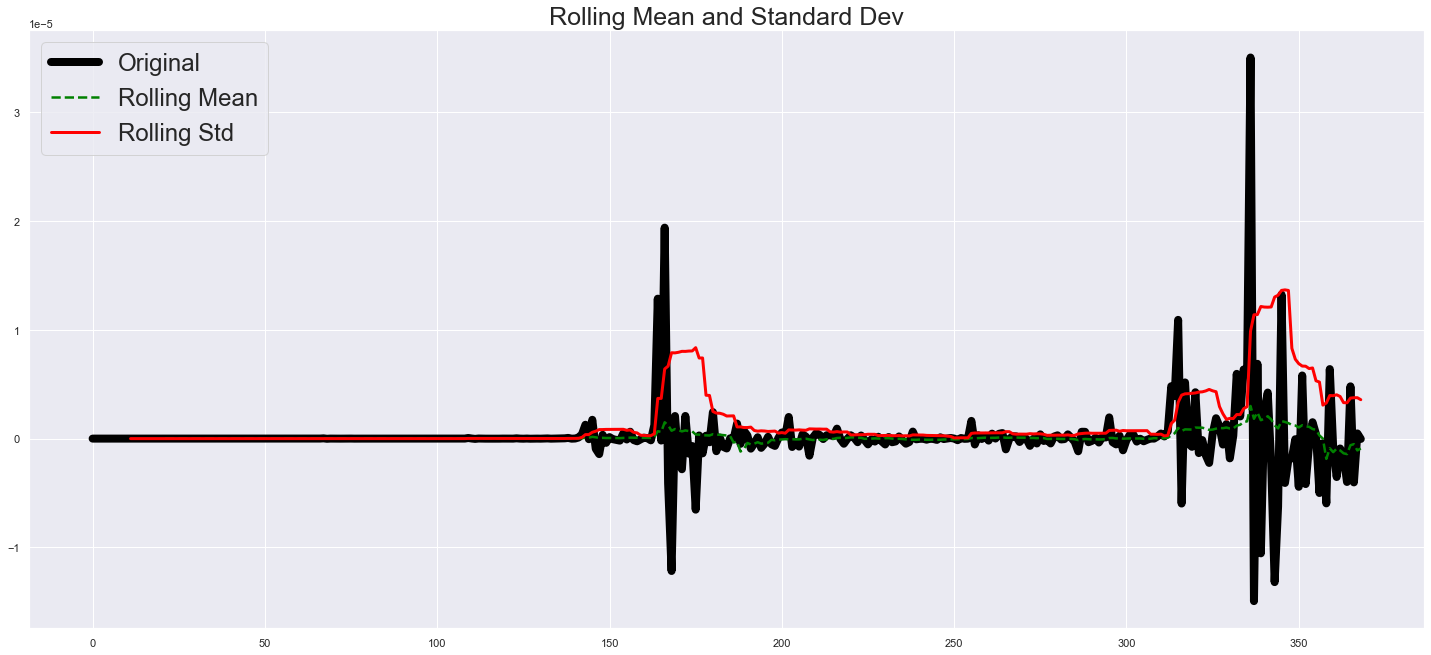

In [76]:
#removing trend from shib
shib_series = pd.read_csv('shib_hist_updt_pr.csv')
X = shib_series.prices
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

shib_adj=pd.DataFrame(diff, columns=['price'])

test_trend(shib_adj, log="stationary")

In [215]:
#Auto Regressive
ar_bt_arima_year=ARIMA(bt_adj['price'], order=(1,1,0)).fit(disp=0)
print(ar_bt_arima_year.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                  378
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -3459.583
Method:                       css-mle   S.D. of innovations           2282.408
Date:                Tue, 14 Dec 2021   AIC                           6925.165
Time:                        22:05:26   BIC                           6936.970
Sample:                             1   HQIC                          6929.850
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.0311     77.485      0.026      0.979    -149.837     153.899
ar.L1.D.price    -0.5164      0.044    -11.758      0.000      -0.603      -0.430
                                    Root

In [216]:
#Moving Average
ma_bt_arima_year=ARIMA(bt_adj['price'], order=(0,1,1)).fit(disp=0)
print(ma_bt_arima_year.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                  378
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -3383.232
Method:                       css-mle   S.D. of innovations           1851.169
Date:                Tue, 14 Dec 2021   AIC                           6772.465
Time:                        22:05:33   BIC                           6784.270
Sample:                             1   HQIC                          6777.150
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.8380      0.869     -0.964      0.335      -2.541       0.865
ma.L1.D.price    -1.0000      0.010   -103.236      0.000      -1.019      -0.981
                                    Root

In [99]:
# Fit model Ar(5) + I(1) + Ma(2)
bt_arima_year=ARIMA(bt_adj['price'], order=(5,1,2)).fit(disp=0)
print(bt_arima_year.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                  378
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -3382.475
Method:                       css-mle   S.D. of innovations           1847.550
Date:                Tue, 14 Dec 2021   AIC                           6782.949
Time:                        19:10:42   BIC                           6818.363
Sample:                             1   HQIC                          6797.005
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.8273      0.891     -0.929      0.353      -2.573       0.918
ar.L1.D.price    -1.0237      0.110     -9.275      0.000      -1.240      -0.807
ar.L2.D.price    -0.0366      0.074     

In [217]:
#Auto Regressive
ar_eth_arima_year=ARIMA(eth_adj['price'], order=(1,1,0)).fit(disp=0)
print(eth_arima_year.summary())
#Moving Average
ma_eth_arima_year=ARIMA(eth_adj['price'], order=(0,1,1)).fit(disp=0)
print(eth_arima_year.summary())
# Fit model Ar(5) + I(1) + Ma(2)
eth_arima_year=ARIMA(eth_adj['price'], order=(2,1,1)).fit(disp=0)
print(eth_arima_year.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                  378
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -2408.081
Method:                       css-mle   S.D. of innovations            140.276
Date:                Tue, 14 Dec 2021   AIC                           4826.161
Time:                        22:06:06   BIC                           4845.836
Sample:                             1   HQIC                          4833.970
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0015      0.062      0.024      0.981      -0.120       0.123
ar.L1.D.price    -0.1102      0.051     -2.142      0.032      -0.211      -0.009
ar.L2.D.price     0.0489      0.051     

In [218]:
#Auto Regressive
ar_doge_arima_year=ARIMA(doge_adj['price'], order=(1,1,0)).fit(disp=0)
print(doge_arima_year.summary())
#Moving Average
ma_doge_arima_year=ARIMA(doge_adj['price'], order=(0,1,1)).fit(disp=0)
print(doge_arima_year.summary())
# Fit model Ar(5) + I(1) + Ma(2)
doge_arima_year=ARIMA(doge_adj['price'], order=(5,1,1)).fit(disp=0)
print(doge_arima_year.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                  378
Model:                 ARIMA(5, 1, 1)   Log Likelihood                 858.946
Method:                       css-mle   S.D. of innovations              0.025
Date:                Tue, 14 Dec 2021   AIC                          -1701.893
Time:                        22:06:15   BIC                          -1670.414
Sample:                             1   HQIC                         -1689.399
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.822e-06   1.07e-05     -0.733      0.464   -2.87e-05    1.31e-05
ar.L1.D.price    -0.1094      0.050     -2.188      0.029      -0.207      -0.011
ar.L2.D.price     0.1002      0.050     

In [219]:
#Auto Regressive
ar_shib_arima_year=ARIMA(shib_adj['price'], order=(1,1,0)).fit(disp=0)
print(shib_arima_year.summary())
#Moving Average
ma_shib_arima_year=ARIMA(shib_adj['price'], order=(0,1,1)).fit(disp=0)
print(shib_arima_year.summary())
# Fit model Ar(5) + I(1) + Ma(2)
shib_arima_year=ARIMA(shib_adj['price'], order=(5,1,0)).fit(disp=0)
print(shib_arima_year.summary())

/Users/ramonvejar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ramonvejar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                  368
Model:                 ARIMA(5, 1, 0)   Log Likelihood                4132.618
Method:                       css-mle   S.D. of innovations              0.000
Date:                Tue, 14 Dec 2021   AIC                          -8251.235
Time:                        22:06:28   BIC                          -8223.878
Sample:                             1   HQIC                         -8240.367
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.766e-09   4.81e-08     -0.037      0.971   -9.61e-08    9.26e-08
ar.L1.D.price    -1.0311      0.051    -20.195      0.000      -1.131      -0.931
ar.L2.D.price    -0.7568      0.070    -

/Users/ramonvejar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [223]:
#Evaluating model Bitcoin yearly
# split into train and test sets
X = bt_adj
size = int(len(X) * 0.66)
btd_train, btd_test = X[0:size], X[size:len(X)]
history = [x for x in btd_train]
predictions = list()

#print(train)
#print(test)

#creating list to store vals
btd_pred_list, btd_actual_list, btd_error_list = [], [], []

#moving test and train values to list
btd_test_price=btd_test.values.tolist()
btd_train_price=btd_train.values.tolist()

#print(train_price)
#print(test_price)

In [226]:
#Arima test and pred for Bitcoin
for n in range(len(btd_test_price)):
    
    # Fit the arima model onto train data
    bt_arima_d = ARIMA(btd_train_price, order=(3, 2, 2)).fit(disp=0)
    
    # Predict next value
    btd_predicted_out = bt_arima_d.forecast(1)[0]
    btd_predicted_out = np.exp(btd_predicted_out)
    btd_pred_list.append(btd_predicted_out)
    
    #Actual Value
    btd_actual_out = btd_test_price[n]
    btd_actual_list.append(btd_actual_out)
    #print(actual_list)
      
    # Compute the error of model
    btd_error = (abs(btd_predicted_out - btd_actual_out) / btd_actual_out) * 100
    btd_error_list.append(btd_error)

In [229]:
bt_arima_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  249
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -2229.675
Method:                       css-mle   S.D. of innovations           1852.475
Date:                Wed, 15 Dec 2021   AIC                           4469.350
Time:                        14:53:12   BIC                           4486.937
Sample:                             1   HQIC                          4476.429
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1635      1.538     -1.407      0.160      -5.178       0.851
ar.L1.D.y     -0.4328      0.522     -0.830      0.407      -1.455       0.590
ma.L1.D.y     -0.6431      0.540     -1.191      0.234      -1.702       0.415
ma.L2.D.y     -0.3568      0.540     -0.661      0.509      -1.415       0.701
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.3108           +0.0000j            2.3108            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -2.8024           +0.0000j            2.8024            0.5000
-----------------------------------------------------------------------------
"""

In [228]:
#Bitcoin Price Predictions
predictions = bt_arima_d.forecast(30)[0]
print(predictions)

[ -76.77186212 -229.16937943 -166.31794128 -196.61709816 -186.60463849
 -194.03733232 -193.92050553 -197.07079024 -198.80720801 -201.15548727
 -203.2389789  -205.43705936 -207.58555065 -209.75550202 -211.91616638
 -214.08084976 -216.24379388 -218.40749067 -220.57086175 -222.73437378
 -224.89782481 -227.06130224 -229.22476824 -231.38823919 -233.551708
 -235.71517773 -237.87864707 -240.04211658 -242.20558601 -244.36905547]


In [232]:
#Evaluating model ETH yearly
# split into train and test sets
E = eth_adj
size = int(len(E) * 0.66)
ethd_train, ethd_test = E[0:size], E[size:len(E)]
history = [x for x in ethd_train]


#print(train)
#print(test)

#creating list to store vals
ethd_pred_list, ethd_actual_list, ethd_error_list = [], [], []

#moving test and train values to list
ethd_test_price=ethd_test.values.tolist()
ethd_train_price=ethd_train.values.tolist()

#print(train_price)
#print(test_price)

In [234]:
#Arima test and pred for ETH
for n in range(len(ethd_test_price)):
    
    # Fit the arima model onto train data
    ethd_arima_d = ARIMA(ethd_train_price, order=(3, 2, 2)).fit(disp=0)
    
    # Predict next value
    ethd_predicted_out = ethd_arima_d.forecast(1)[0]
    ethd_predicted_out = np.exp(ethd_predicted_out)
    ethd_pred_list.append(ethd_predicted_out)
    
    #Actual Value
    ethd_actual_out = ethd_test_price[n]
    ethd_actual_list.append(ethd_actual_out)
    #print(actual_list)
      
    # Compute the error of model
    ethd_error = (abs(ethd_predicted_out - btd_actual_out) / ethd_actual_out) * 100
    ethd_error_list.append(ethd_error)

/Users/ramonvejar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/ramonvejar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ramonvejar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/ramonvejar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ramonvejar/opt/anaconda3/lib/py

In [235]:
ethd_arima_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  248
Model:                 ARIMA(3, 2, 2)   Log Likelihood               -1567.484
Method:                       css-mle   S.D. of innovations            129.901
Date:                Wed, 15 Dec 2021   AIC                           3148.969
Time:                        15:05:48   BIC                           3173.563
Sample:                             2   HQIC                          3158.869
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0004      0.004     -0.104      0.917      -0.008       0.008
ar.L1.D2.y    -0.1307      0.065     -2.021      0.043      -0.257      -0.004
ar.L2.D2.y     0.1653      0.065      2.538      0.011       0.038       0.293
ar.L3.D2.y     0.0302      0.064      0.470      0.638      -0.096       0.156
ma.L1.D2.y    -1.9902      0.014   -142.348      0.000      -2.018      -1.963
ma.L2.D2.y     0.9902      0.014     70.313      0.000       0.963       1.018
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3521           +0.0000j            2.3521            0.0000
AR.2           -2.8041           +0.0000j            2.8041            0.5000
AR.3           -5.0187           +0.0000j            5.0187            0.5000
MA.1            1.0020           +0.0000j            1.0020            0.0000
MA.2            1.0079           +0.0000j            1.0079            0.0000
-----------------------------------------------------------------------------
"""

In [236]:
#eth Price Predictions
ethd_predictions = ethd_arima_d.forecast(30)[0]
print(predictions)

[ -76.77186212 -229.16937943 -166.31794128 -196.61709816 -186.60463849
 -194.03733232 -193.92050553 -197.07079024 -198.80720801 -201.15548727
 -203.2389789  -205.43705936 -207.58555065 -209.75550202 -211.91616638
 -214.08084976 -216.24379388 -218.40749067 -220.57086175 -222.73437378
 -224.89782481 -227.06130224 -229.22476824 -231.38823919 -233.551708
 -235.71517773 -237.87864707 -240.04211658 -242.20558601 -244.36905547]


In [239]:
#Evaluating model doge yearly
# split into train and test sets
D = doge_adj
size = int(len(D) * 0.66)
doged_train, doged_test = D[0:size], D[size:len(D)]
history = [x for x in doged_train]


#print(train)
#print(test)

#creating list to store vals
doged_pred_list, doged_actual_list, doged_error_list = [], [], []

#moving test and train values to list
doged_test_price=doged_test.values.tolist()
doged_train_price=doged_train.values.tolist()

#print(train_price)
#print(test_price)

In [243]:
#Arima test and pred for Doge
for n in range(len(doged_test_price)):
    
    # Fit the arima model onto train data
    doged_arima_d = ARIMA(doged_train_price, order=(3, 2, 2)).fit(disp=0)
    
    # Predict next value
    doged_predicted_out = doged_arima_d.forecast(1)[0]
    doged_predicted_out = np.exp(doged_predicted_out)
    doged_pred_list.append(doged_predicted_out)
    
    #Actual Value
    doged_actual_out = doged_test_price[n]
    doged_actual_list.append(doged_actual_out)
    #print(actual_list)
      
    # Compute the error of model
    doged_error = (abs(doged_predicted_out - doged_actual_out) / doged_actual_out) * 100
    doged_error_list.append(doged_error)

In [241]:
doged_arima_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  248
Model:                 ARIMA(3, 2, 2)   Log Likelihood                 495.425
Method:                       css-mle   S.D. of innovations              0.032
Date:                Wed, 15 Dec 2021   AIC                           -976.851
Time:                        15:13:29   BIC                           -952.257
Sample:                             2   HQIC                          -966.950
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.59e-07    1.1e-05     -0.023      0.981   -2.19e-05    2.14e-05
ar.L1.D2.y    -1.1571      0.173     -6.674      0.000      -1.497      -0.817
ar.L2.D2.y    -0.7813      0.152     -5.140      0.000      -1.079      -0.483
ar.L3.D2.y    -0.3321      0.080     -4.160      0.000      -0.489      -0.176
ma.L1.D2.y    -0.7456      0.178     -4.188      0.000      -1.095      -0.397
ma.L2.D2.y    -0.2544      0.178     -1.431      0.152      -0.603       0.094
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4000           -0.0000j            1.4000           -0.5000
AR.2           -0.4762           -1.3870j            1.4664           -0.3026
AR.3           -0.4762           +1.3870j            1.4664            0.3026
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -3.9312           +0.0000j            3.9312            0.5000
-----------------------------------------------------------------------------
"""

In [244]:
#Doge Price Predictions
doged_predictions = doged_arima_d.forecast(30)[0]
print(doged_predictions)

[ 0.00064646 -0.00025398 -0.00034291 -0.00191989  0.00019121 -0.0010729
 -0.00081973 -0.00091091 -0.00066891 -0.00104819 -0.00085538 -0.00095063
 -0.00095405 -0.00102952 -0.00099853 -0.00106578 -0.00107946 -0.00111457
 -0.00113496 -0.00117428 -0.00119692 -0.00122981 -0.00125843 -0.00129037
 -0.00131925 -0.00135134 -0.00138185 -0.00141354 -0.00144488 -0.00147708]


In [245]:
#Evaluating model shiba-inu yearly
# split into train and test sets
S = shib_adj
size = int(len(S) * 0.66)
shibd_train, shibd_test = S[0:size], S[size:len(S)]
history = [x for x in shibd_train]


#print(train)
#print(test)

#creating list to store vals
shibd_pred_list, shibd_actual_list, shibd_error_list = [], [], []

#moving test and train values to list
shibd_test_price=shibd_test.values.tolist()
shibd_train_price=shibd_train.values.tolist()

#print(train_price)
#print(test_price)

In [247]:
#Arima test and pred for shib
for n in range(len(shibd_test_price)):
    
    # Fit the arima model onto train data
    shibd_arima_d = ARIMA(shibd_train_price, order=(3, 2, 0)).fit(disp=0)
    
    # Predict next value
    shibd_predicted_out = shibd_arima_d.forecast(1)[0]
    shibd_predicted_out = np.exp(shibd_predicted_out)
    shibd_pred_list.append(shibd_predicted_out)
    
    #Actual Value
    shibd_actual_out = shibd_test_price[n]
    shibd_actual_list.append(shibd_actual_out)
    #print(actual_list)
      
    # Compute the error of model
    shibd_error = (abs(shibd_predicted_out - shibd_actual_out) / shibd_actual_out) * 100
    shibd_error_list.append(shibd_error)

/Users/ramonvejar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ramonvejar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ramonvejar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ramonvejar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ramonvejar/opt/anaconda3/

In [248]:
shibd_arima_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  241
Model:                 ARIMA(3, 2, 0)   Log Likelihood                2759.463
Method:                       css-mle   S.D. of innovations              0.000
Date:                Wed, 15 Dec 2021   AIC                          -5508.927
Time:                        15:20:54   BIC                          -5491.503
Sample:                             2   HQIC                         -5501.907
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.513e-10   5.63e-08     -0.006      0.995   -1.11e-07     1.1e-07
ar.L1.D2.y    -1.3236      0.062    -21.453      0.000      -1.445      -1.203
ar.L2.D2.y    -0.9695      0.084    -11.503      0.000      -1.135      -0.804
ar.L3.D2.y    -0.3030      0.061     -4.938      0.000      -0.423      -0.183
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.7053           -1.1606j            1.3581           -0.3369
AR.2           -0.7053           +1.1606j            1.3581            0.3369
AR.3           -1.7894           -0.0000j            1.7894           -0.5000
-----------------------------------------------------------------------------
"""

In [249]:
#shib Price Predictions
shibd_predictions = shibd_arima_d.forecast(30)[0]
print(shibd_predictions)

[-2.54282637e-07 -2.16684961e-07 -3.40174093e-07 -4.18456757e-07
 -4.60616466e-07 -5.46876655e-07 -6.24746529e-07 -6.83173122e-07
 -7.63372161e-07 -8.37409004e-07 -9.05647563e-07 -9.82202291e-07
 -1.05650161e-06 -1.12874369e-06 -1.20463936e-06 -1.27964041e-06
 -1.35417012e-06 -1.43034761e-06 -1.50633556e-06 -1.58238310e-06
 -1.65929978e-06 -1.73632918e-06 -1.81361216e-06 -1.89145036e-06
 -1.96953714e-06 -2.04794324e-06 -2.12678094e-06 -2.20592594e-06
 -2.28541248e-06 -2.36528174e-06]
